<a href="https://colab.research.google.com/github/Dvkandwal/Dvkandwal/blob/main/cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog
!unzip cat-and-dog.zip -d ./data



Streaming output truncated to the last 5000 lines.
  inflating: ./data/training_set/training_set/cats/cat.3704.jpg  
  inflating: ./data/training_set/training_set/cats/cat.3705.jpg  
  inflating: ./data/training_set/training_set/cats/cat.3706.jpg  
  inflating: ./data/training_set/training_set/cats/cat.3707.jpg  
  inflating: ./data/training_set/training_set/cats/cat.3708.jpg  
  inflating: ./data/training_set/training_set/cats/cat.3709.jpg  
  inflating: ./data/training_set/training_set/cats/cat.371.jpg  
  inflating: ./data/training_set/training_set/cats/cat.3710.jpg  
  inflating: ./data/training_set/training_set/cats/cat.3711.jpg  
  inflating: ./data/training_set/training_set/cats/cat.3712.jpg  
  inflating: ./data/training_set/training_set/cats/cat.3713.jpg  
  inflating: ./data/training_set/training_set/cats/cat.3714.jpg  
  inflating: ./data/training_set/training_set/cats/cat.3715.jpg  
  inflating: ./data/training_set/training_set/cats/cat.3716.jpg  
  inflating: ./data/traini

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-and-dog.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!kaggle kernels pull accountstatus/cats-v-dogs-using-pytorch-without-torchvision

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


[Epoch 1/10] [Batch 1/32] [D loss: 0.692543625831604] [G loss: 0.6883415579795837]
[Epoch 1/10] [Batch 2/32] [D loss: 0.6123309135437012] [G loss: 0.7017996311187744]
[Epoch 1/10] [Batch 3/32] [D loss: 0.5430213809013367] [G loss: 0.7164300084114075]
[Epoch 1/10] [Batch 4/32] [D loss: 0.4769554138183594] [G loss: 0.728356659412384]
[Epoch 1/10] [Batch 5/32] [D loss: 0.4231305718421936] [G loss: 0.7414010763168335]
[Epoch 1/10] [Batch 6/32] [D loss: 0.4325670003890991] [G loss: 0.7557171583175659]
[Epoch 1/10] [Batch 7/32] [D loss: 0.38952964544296265] [G loss: 0.7712299823760986]
[Epoch 1/10] [Batch 8/32] [D loss: 0.3578084707260132] [G loss: 0.7862554788589478]
[Epoch 1/10] [Batch 9/32] [D loss: 0.3601113557815552] [G loss: 0.801642656326294]
[Epoch 1/10] [Batch 10/32] [D loss: 0.3288051187992096] [G loss: 0.8240742683410645]
[Epoch 1/10] [Batch 11/32] [D loss: 0.31066545844078064] [G loss: 0.8448938727378845]
[Epoch 1/10] [Batch 12/32] [D loss: 0.29548361897468567] [G loss: 0.8714294

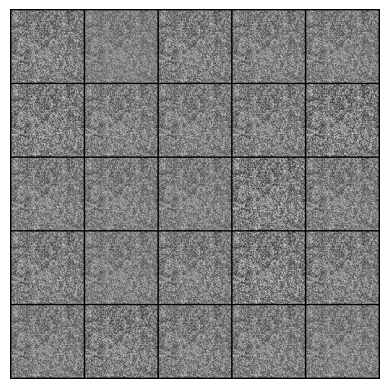

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from torchvision.utils import save_image, make_grid
import matplotlib.pyplot as plt

# Define the Generator
class Generator(nn.Module):
    def __init__(self, z_dim=100, img_dim=1, img_size=100):
        super(Generator, self).__init__()
        self.img_size = img_size
        self.net = nn.Sequential(
            nn.Linear(z_dim, 128),
            nn.ReLU(True),
            nn.Linear(128, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, img_dim * img_size * img_size),
            nn.Tanh()
        )

    def forward(self, x):
        img = self.net(x)
        img = img.view(img.size(0), -1, self.img_size, self.img_size)
        return img

# Define the Discriminator
class Discriminator(nn.Module):
    def __init__(self, img_dim=1, img_size=100):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(img_dim * img_size * img_size, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        validity = self.net(x)
        return validity

# Hyperparameters
z_dim = 100
img_size = 100
batch_size = 64
lr = 0.0002
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Prepare Data
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

dataset = datasets.ImageFolder(root='/content/test_set', transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Initialize models and optimizers
generator = Generator(z_dim, img_dim=1, img_size=img_size).to(device)
discriminator = Discriminator(img_dim=1, img_size=img_size).to(device)
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)
adversarial_loss = nn.BCELoss()

# Training
for epoch in range(num_epochs):
    for i, (imgs, _) in enumerate(dataloader):
        imgs = imgs.to(device)

        # Adversarial ground truths
        valid = torch.ones(imgs.size(0), 1, requires_grad=False).to(device)
        fake = torch.zeros(imgs.size(0), 1, requires_grad=False).to(device)


        # Train Generator
        optimizer_G.zero_grad()
        z = torch.randn(imgs.size(0), z_dim).to(device)
        gen_imgs = generator(z)
        g_loss = adversarial_loss(discriminator(gen_imgs), valid)
        g_loss.backward()
        optimizer_G.step()

        # Train Discriminator

        optimizer_D.zero_grad()
        real_loss = adversarial_loss(discriminator(imgs), valid)
        fake_loss = adversarial_loss(discriminator(gen_imgs.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

        print(f"[Epoch {epoch+1}/{num_epochs}] [Batch {i+1}/{len(dataloader)}] [D loss: {d_loss.item()}] [G loss: {g_loss.item()}]")

    # Save generated images
    if (epoch + 1) % 10 == 0:
        save_image(gen_imgs.data[:25], f"images_{epoch+1}.png", nrow=5, normalize=True)

# Save the model
torch.save(generator.state_dict(), 'generator.pth')
torch.save(discriminator.state_dict(), 'discriminator.pth')

# Generate a grid of cat images
z = torch.randn(25, z_dim).to(device)
gen_imgs = generator(z)
gen_imgs = make_grid(gen_imgs, nrow=5, normalize=True).permute(1, 2, 0).cpu().detach().numpy()
plt.imshow(gen_imgs)
plt.axis('off')
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Mount Google Drive if needed for model loading
from google.colab import drive
drive.mount('/content/drive')

# Define transformations for the test set
transform = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the test dataset from /content/test_set
test_dataset = datasets.ImageFolder(root='/content/test_set', transform=transform)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

# Define the Generator class (same as in your previous code)
class Generator(nn.Module):
    def __init__(self, z_dim=100, img_dim=1, img_size=100):
        super(Generator, self).__init__()
        self.img_size = img_size
        self.net = nn.Sequential(
            nn.Linear(z_dim, 128),
            nn.ReLU(True),
            nn.Linear(128, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, img_dim * img_size * img_size),
            nn.Tanh()
        )

    def forward(self, x):
        img = self.net(x)
        img = img.view(img.size(0), -1, self.img_size, self.img_size)
        return img

# Initialize the model and load the trained state
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Initialize the Generator, not the CNN
generator = Generator(z_dim=100, img_dim=1, img_size=100).to(device)
model_path = '/content/generator.pth'  # Update this path if needed
# Load the state dictionary into the generator
generator.load_state_dict(torch.load(model_path, map_location=device))
generator.eval()  # Set the model to evaluation mode

# For example, to generate images:
z = torch.randn(25, 100).to(device)
gen_imgs = generator(z)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
